<a href="https://colab.research.google.com/github/Quratulain786/-R-versus-Python-EDA/blob/main/bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ensemble Learning: Bagging**

Download heart disease dataset heart.csv and do following, (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)

1.Load heart disease dataset in pandas dataframe
2.Remove outliers using Z score. Usual guideline is to remove anything that has 3.Z score > 3 formula or Z score < -3
4.Convert text columns to numbers using label encoding and one hot encoding
5.Apply scaling
6.Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
7.Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life

## **Ensemble Learning: Bagging**

Download heart disease dataset heart.csv and do following, (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)

1. Load heart disease dataset in pandas dataframe
2. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
Convert text columns to numbers using label encoding and one hot encoding
3. Apply scaling
4.Build a classification model using support vector machine. Use standalone model as well as Bagging model and check if you see any difference in the performance.
5. Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance
6. Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why. Use internet to figure out in what conditions bagging works the best.

In [94]:
#----1
import pandas as pd
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [95]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [96]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [97]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [98]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [99]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [100]:
# For the first few rows
print(df['Sex'].head())
# For the last few rows
print(df['Sex'].tail())
# For the first few rows
print(df['ChestPainType'].head())
# For the last few rows
print(df['ChestPainType'].tail())
print(df['ChestPainType'].info())
print(df['ChestPainType'].describe())


0    M
1    F
2    M
3    F
4    M
Name: Sex, dtype: object
913    M
914    M
915    M
916    F
917    M
Name: Sex, dtype: object
0    ATA
1    NAP
2    ATA
3    ASY
4    NAP
Name: ChestPainType, dtype: object
913     TA
914    ASY
915    ASY
916    ATA
917    NAP
Name: ChestPainType, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: ChestPainType
Non-Null Count  Dtype 
--------------  ----- 
918 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB
None
count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object


In [101]:
# Assuming 'column_name' is the name of the column you want to check
ChestPainType_counts = df['ChestPainType'].value_counts()
print(ChestPainType_counts)

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


In [102]:
correlation = df.corr(numeric_only=True).unstack().sort_values(ascending=False).drop_duplicates()
print(correlation)



Age           Age             1.000000
Oldpeak       HeartDisease    0.403951
HeartDisease  Age             0.282039
FastingBS     HeartDisease    0.267291
Age           Oldpeak         0.258612
RestingBP     Age             0.254399
Cholesterol   MaxHR           0.235792
FastingBS     Age             0.198039
RestingBP     Oldpeak         0.164803
              HeartDisease    0.107589
Cholesterol   RestingBP       0.100893
FastingBS     RestingBP       0.070193
              Oldpeak         0.052698
Cholesterol   Oldpeak         0.050148
              Age            -0.095282
RestingBP     MaxHR          -0.112135
MaxHR         FastingBS      -0.131438
              Oldpeak        -0.160691
Cholesterol   HeartDisease   -0.232741
              FastingBS      -0.260974
MaxHR         Age            -0.382045
HeartDisease  MaxHR          -0.400421
dtype: float64


In [103]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


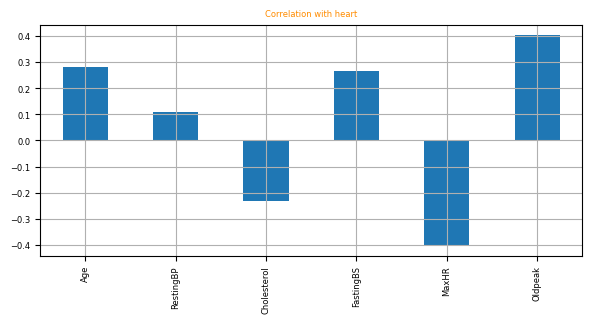

In [104]:
#Correlation with Response Variable class
X = df.drop(['HeartDisease'], axis=1)
y =df['HeartDisease']

X.corrwith(y,numeric_only=True).plot.bar(figsize=(7, 3), rot=90, grid=True)
plt.title('Correlation with heart',
          fontsize=25,
          color='DarkOrange',
          font='Lucida Calligraphy')
plt.show()

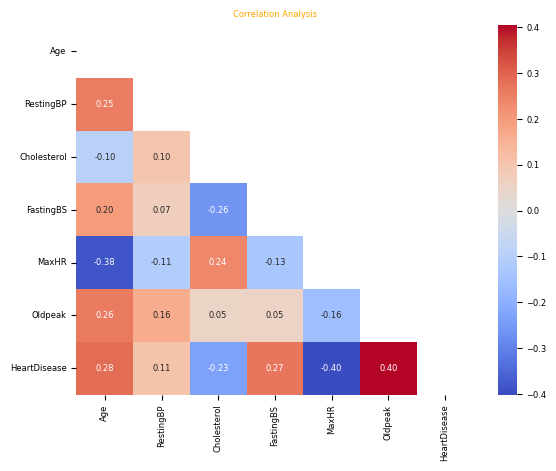

In [105]:
import numpy as np
plt.rcParams.update({'font.size': 6})

corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis',
          fontsize=5,
          color='Orange',
          font='Lucida Calligraphy')
sns.heatmap(corr,
            mask=mask,
            annot=True,
            lw=0,
            linecolor='white',
            cmap='coolwarm',#color pallet's name
            fmt="0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [106]:
# check oulier
df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [107]:


df1 = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]
df1.shape


(915, 12)

In [108]:
df[df.MaxHR>(df.MaxHR.mean()+3*df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [109]:
df[df.FastingBS>(df.FastingBS.mean()+3*df.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [110]:
df[df.Oldpeak>(df.Oldpeak.mean()+3*df.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [111]:
df2 = df1[df1.Oldpeak<=(df1.Oldpeak.mean()+3*df1.Oldpeak.std())]
df2.shape


(909, 12)

In [112]:

df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [113]:
df3 = df2[df2.RestingBP<=(df2.RestingBP.mean()+3*df2.RestingBP.std())]
df3.shape

(902, 12)

In [114]:
print(df.ChestPainType.unique())
print(df.RestingECG.unique())
print(df.ExerciseAngina.unique())
print(df.ST_Slope.unique())

['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [126]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
df4 = df3.copy()
df4.ExerciseAngina. replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

df4.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

df4.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [124]:
df5 = pd.get_dummies(df4, drop_first=True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,True,True,False,False
1,49,160,180,0,1,156,0,1.0,2,1,False,False,True,False
2,37,130,283,0,2,98,0,0.0,3,0,True,True,False,False
3,48,138,214,0,1,108,1,1.5,2,1,False,False,False,False
4,54,150,195,0,1,122,0,0.0,3,0,True,False,True,False


In [125]:
X = df5.drop("HeartDisease",axis='columns')
y = df5.HeartDisease
X.head()


,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,True,True,False,False
1,49,160,180,0,1,156,0,1.0,2,False,False,True,False
2,37,130,283,0,2,98,0,0.0,3,True,True,False,False
3,48,138,214,0,1,108,1,1.5,2,False,False,False,False
4,54,150,195,0,1,122,0,0.0,3,True,False,True,False


In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=20)

In [129]:
print(X_train.shape)

print(X_test.shape)


(721, 13)
(181, 13)


In [137]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)


0.8784530386740331

In [138]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca


array([[ 93.82465373, -29.40099458],
       [-15.58422331, -14.10909233],
       [ 83.29606634,  38.6867453 ],
       ...,
       [-67.57318721,  17.61319354],
       [ 40.70458237, -33.38750602],
       [-19.91368346, -37.29085722]])

In [140]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
model_rf.score(X_test_pca, y_test)

0.712707182320442

In [139]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

Question-2

In [130]:
#Train a model using  support vector machine and then using bagging
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVC(), X, y, cv=5)
scores.mean()

0.6906445672191528

In [132]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(base_estimator=SVC(), n_estimators=100, max_samples=0.8, random_state=0)
scores = cross_val_score(bag_model, X, y, cv=5)
scores.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.6839656230816453

In [133]:
#Train a model using decision tree and then using bagging
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=5)
scores.mean()

0.7193984039287907

In [135]:
#Use bagging now with decision tree
bag_model = BaggingClassifier(
  base_estimator=DecisionTreeClassifier(random_state=0),
    n_estimators=100,
    max_samples=0.9,
    oob_score=True,
    random_state=0
)

scores = cross_val_score(bag_model, X, y, cv=5)
scores.mean()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8037016574585636

In [136]:
#Train a model using Random Forest which itself uses bagging underneath
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
scores.mean()


0.8247882136279927